In [3]:
import numpy as np
import matplotlib.pyplot as plt
import julian
import datetime
%matplotlib inline

In [4]:
f=open("aavso_T (1).txt","r")
lines=f.readlines()
mags=[]
JD = []
err = []
band = []
date = []

for x in lines:   
    mags.append(x.split(',')[1])
    JD.append(x.split(',')[0])
    err.append(x.split(',')[2])
    band.append(x.split(',')[4])            
f.close()

    
v_pos = [i for i, x in enumerate(band) if x == "V"]
b_pos = [i for i, x in enumerate(band) if x == "B"]
i_pos = [i for i, x in enumerate(band) if x == "I"]
r_pos = [i for i, x in enumerate(band) if x == "R"]
u_pos = [i for i, x in enumerate(band) if x == "U"]

vis_pos = [i for i, x in enumerate(band) if x == "Vis."]
#print(v_pos)
mag_array = np.array(mags)
JD_array = np.array(JD)
date_array = np.array(date)

v_mags = mag_array[v_pos]
v_JD = JD_array[v_pos]
v_JD = v_JD.astype(float)
v_mags = v_mags.astype(float)

b_mags = mag_array[b_pos]
b_JD = JD_array[b_pos]
b_JD = b_JD.astype(float)
b_mags = b_mags.astype(float)

i_mags = mag_array[i_pos]
i_JD = JD_array[i_pos]
i_JD = i_JD.astype(float)
i_mags = i_mags.astype(float)

r_mags = mag_array[r_pos]
r_JD = JD_array[r_pos]
r_JD = r_JD.astype(float)
r_mags = r_mags.astype(float)

u_mags = mag_array[u_pos]
u_JD = JD_array[u_pos]
u_JD = u_JD.astype(float)
u_mags = u_mags.astype(float)

vis_mags = mag_array[vis_pos]
vis_JD = JD_array[vis_pos]
vis_JD = vis_JD.astype(float)
vis_mags = vis_mags.astype(float)

In [5]:
del mags[0]
del JD[0]
del err[0]
print(len(vis_mags))

112812


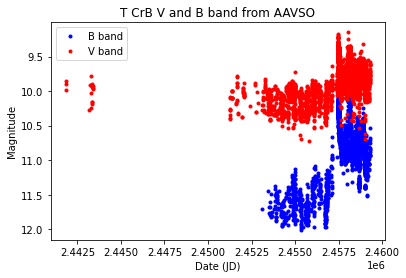

In [6]:



plt.gca().invert_yaxis()
plt.plot(b_JD,b_mags,'b.',label = 'B band')
plt.plot(v_JD,v_mags,'r.',label = 'V band')
#plt.plot(i_JD,i_mags,'m.',label = 'I band')
#plt.plot(r_JD,r_mags,'r.',label = 'R band')
#plt.plot(u_JD,u_mags,'y.',label = 'U band')
plt.title('T CrB V and B band from AAVSO')
plt.xlabel('Date (JD)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

Text(0.5, 1.0, 'T CrB Visual Magnitude plot from AAVSO and DASCH')

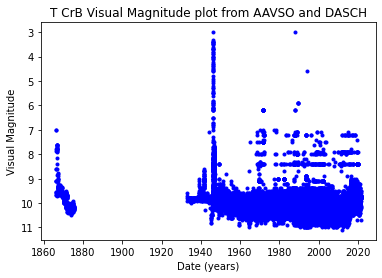

In [7]:
vis_date = []
length = len(vis_JD)
n = 0
while n < length:
    vis_date.append(julian.from_jd(vis_JD[n]-2400000.5, fmt='mjd'))
    n = n+1
    
    


plt.plot(vis_date,vis_mags,'b.',label = 'Visual band')
plt.gca().invert_yaxis()
plt.ylabel('Visual Magnitude')
plt.xlabel('Date (years)')
plt.title('T CrB Visual Magnitude plot from AAVSO and DASCH')


In [8]:
v_JD_r = [round(num,3) for num in v_JD]
b_JD_r = [round(num,3) for num in b_JD]

v_JD_r = np.array(v_JD_r)
b_JD_r = np.array(b_JD_r)



In [9]:
t_JD_r = (np.intersect1d(b_JD_r, v_JD_r))

In [10]:
#print(t_JD_r)

In [11]:
t_v_pos = (v_JD_r[:, None] == t_JD_r).argmax(axis=0)

t_b_pos = (b_JD_r[:, None] == t_JD_r).argmax(axis=0)

#print(t_v_pos)
#print(t_b_pos)

In [12]:
t_v_mags = v_mags[t_v_pos]
t_b_mags = b_mags[t_b_pos]

In [13]:
#print(t_v_mags)

In [14]:
#print(t_b_mags)

In [15]:
t_b_mags = t_b_mags.astype(float)

t_v_mags = t_v_mags.astype(float)


In [50]:
bmv = t_b_mags - t_v_mags
#print(bmv)

np.mean(bmv)

0.9725445714285715

In [17]:
teff = []
def temp(BV):
    T =  ( (1/((0.92*BV)+1.7)) + (1/((0.92*BV)+0.62)) ) * 4600
    teff.append(T)
    return T

In [18]:
n = 0
for i in bmv:
    temp(bmv[n])
    n = n + 1

In [19]:
#print(teff)

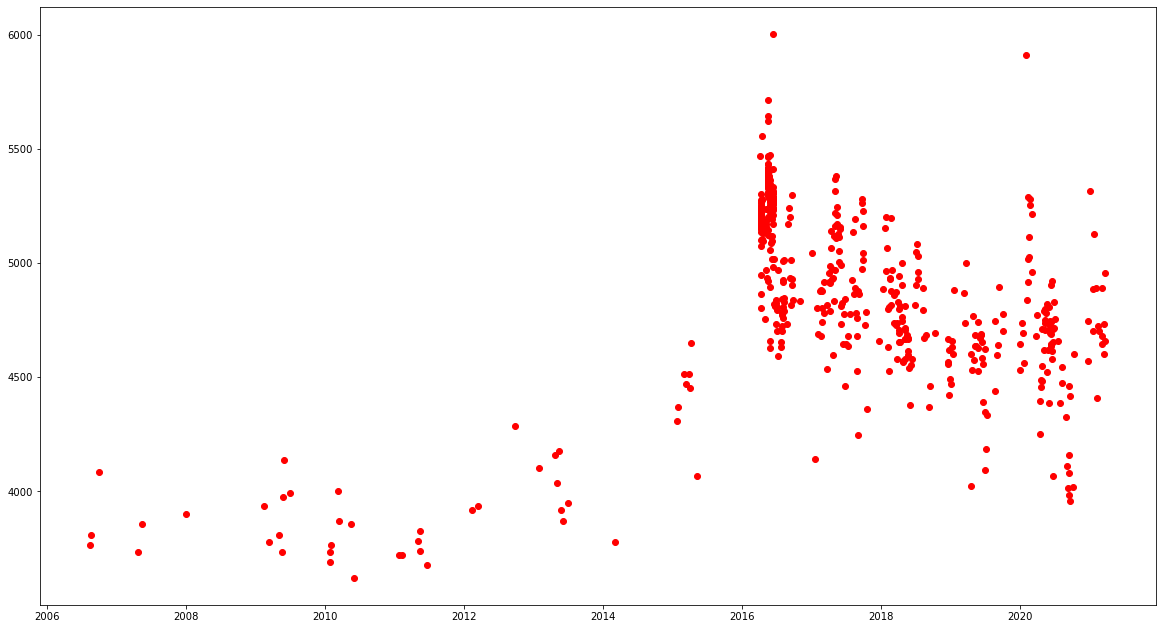

In [20]:
t_date = []
length = len(t_JD_r)
n = 0
while n < length:
    t_date.append(julian.from_jd(t_JD_r[n]-2400000.5, fmt='mjd'))
    n = n+1
    



plt.figure(figsize = (20,11))
plt.plot(t_date,teff,'ro')

In [21]:
b_date = []
length = len(b_JD)
n = 0
while n < length:
    b_date.append(julian.from_jd(b_JD[n]-2400000.5, fmt='mjd'))
    n = n+1

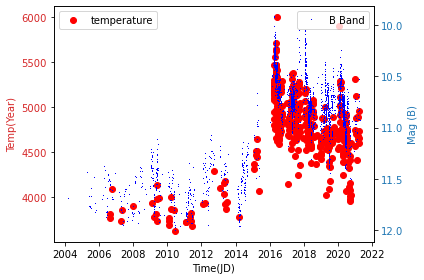

In [22]:
data1 = teff
data2 = b_mags
t = b_JD

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time(JD)')
ax1.set_ylabel('Temp(Year)', color=color)


ax1.plot(t_date, data1, 'ro',label = 'temperature')
plt.legend(loc=2)

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Mag (B)', color=color)  # we already handled the x-label with ax1
ax2.plot(b_date, data2, 'b,',label = 'B Band')
plt.legend()
plt.gca().invert_yaxis()
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [23]:
# plt.figure(figsize = (20,11))
# plt.plot(t_JD_r,bmv,'ko')
# plt.xlabel('Date (JD)')
# plt.title('B-V Index T Crb')

Text(0, 0.5, 'Mag')

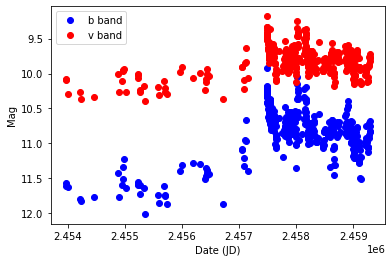

In [24]:
plt.gca().invert_yaxis()
plt.plot(t_JD_r,t_b_mags,'bo',label = 'b band')
plt.plot(t_JD_r,t_v_mags,'ro',label = 'v band')
plt.legend()

plt.xlabel('Date (JD)')
plt.ylabel('Mag')

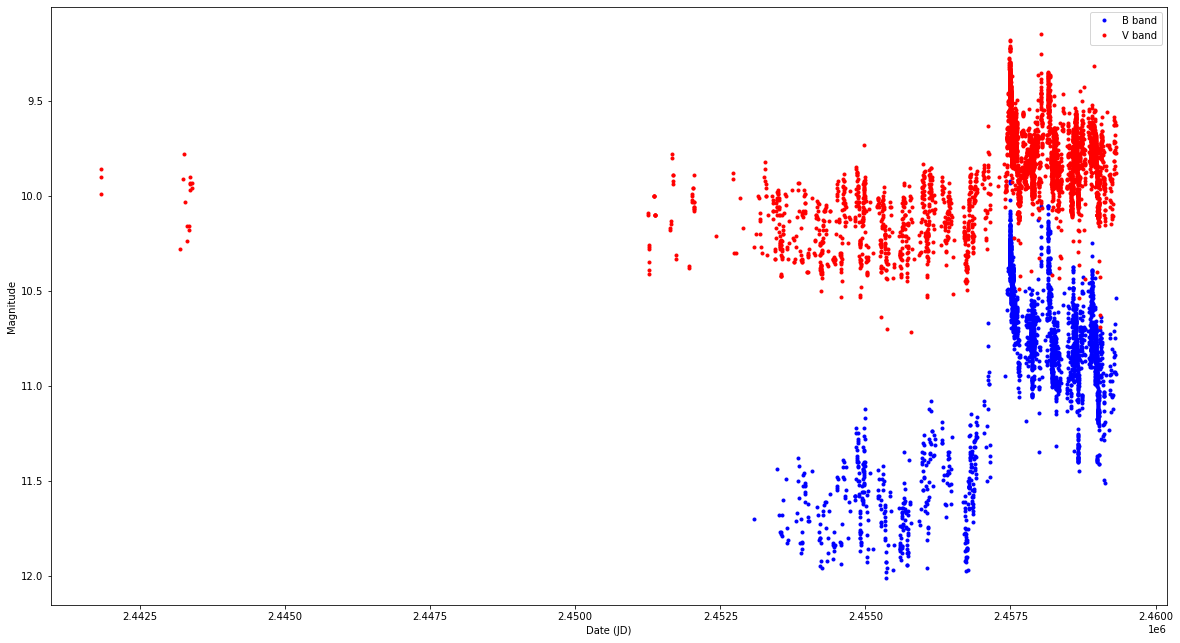

In [25]:
plt.figure(figsize=(20,11))

plt.gca().invert_yaxis()
plt.plot(b_JD,b_mags,'b.',label = 'B band')
plt.plot(v_JD,v_mags,'r.',label = 'V band')
plt.xlabel('Date (JD)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

In [26]:
v_date = []
length = len(v_JD)
n = 0
while n < length:
    v_date.append(julian.from_jd(v_JD[n]-2400000.5, fmt='mjd'))
    n = n+1
    

Text(0.5, 1.0, 'Red Giant Companion lightcurve of T CrB in V')

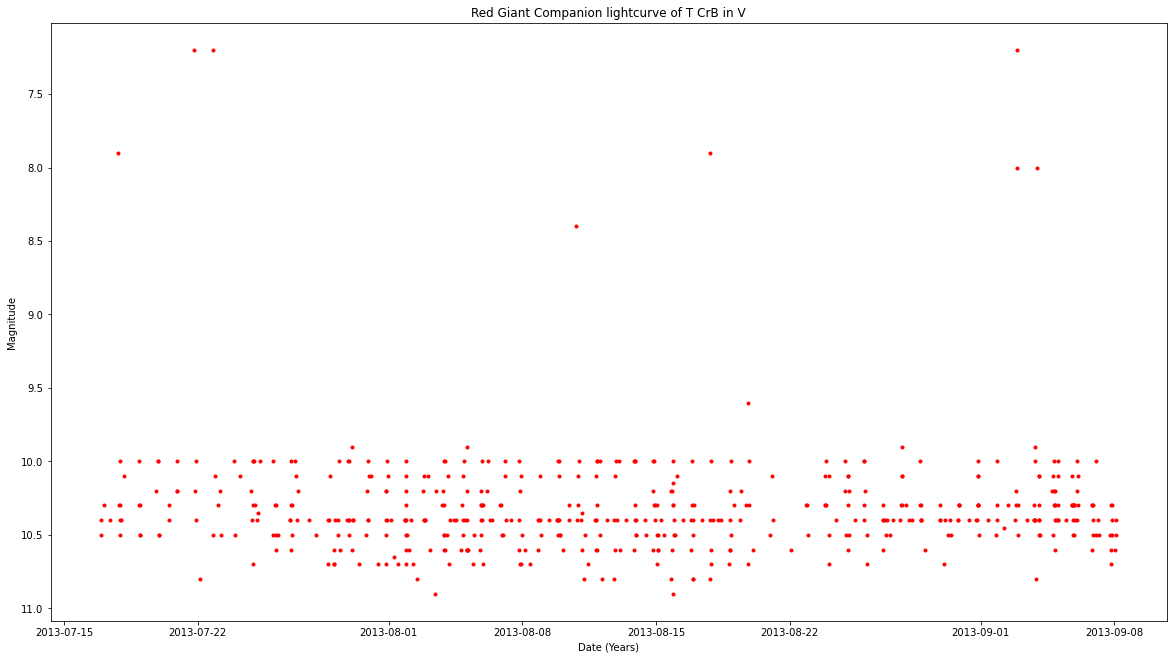

In [44]:
plt.figure(figsize=(20,11))
plt.gca().invert_yaxis()
rd_date = vis_date[99000:100000]
rd_v_mags = vis_mags[99000:100000]
plt.plot(rd_date,rd_v_mags,'r.',label = 'V band')

plt.xlabel('Date (Years)')
plt.ylabel('Magnitude')
plt.title('Red Giant Companion lightcurve of T CrB in V')

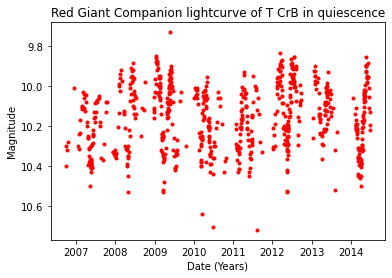

In [49]:
plt.gca().invert_yaxis()
plt.plot(v_date[200:900],v_mags[200:900],'r.',label = 'V band')
#plt.plot(b_JD[:900],b_mags[:900],'b.',label = 'B band')
plt.xlabel('Date (Years)')
plt.ylabel('Magnitude')
plt.title('Red Giant Companion lightcurve of T CrB in quiescence')
plt.savefig('t crb comp')

In [29]:
from scipy import optimize

def test_func(x, a, b):
    return a * np.sin(b * x)
x_data = v_JD[200:900]
y_data = v_mags[200:900]
params, params_covariance = optimize.curve_fit(test_func, x_data, y_data,
                                               p0=[2, 2])

print(params)

[-1.30035654  2.00000002]


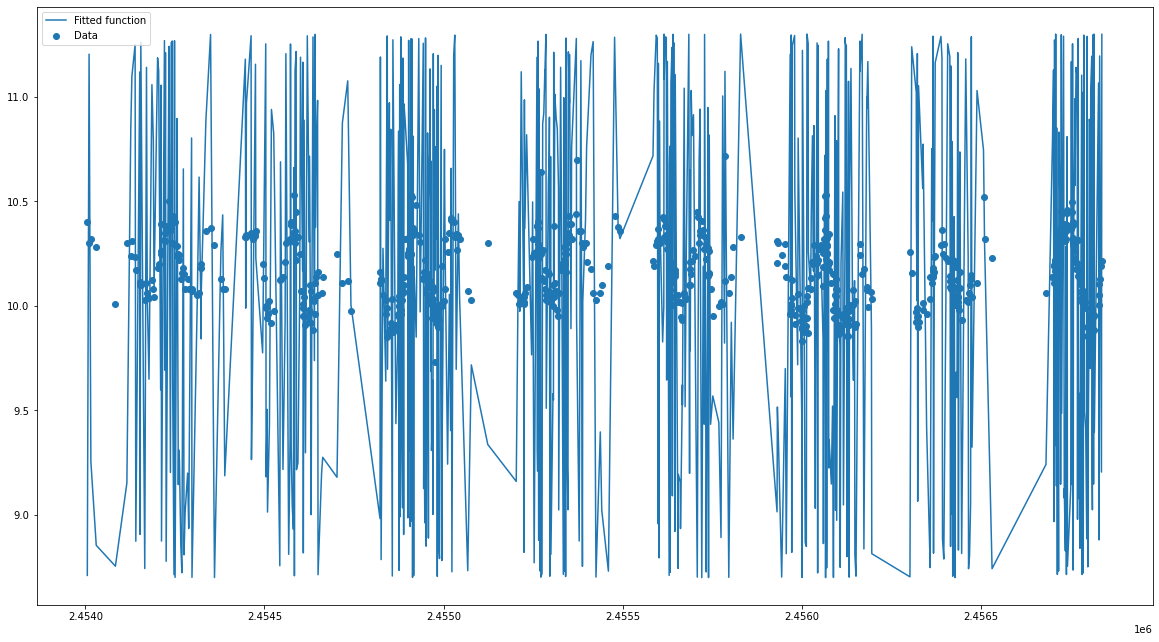

In [30]:
plt.figure(figsize=(20,11))
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1])+10,
         label='Fitted function')

plt.legend(loc='best')

plt.show()

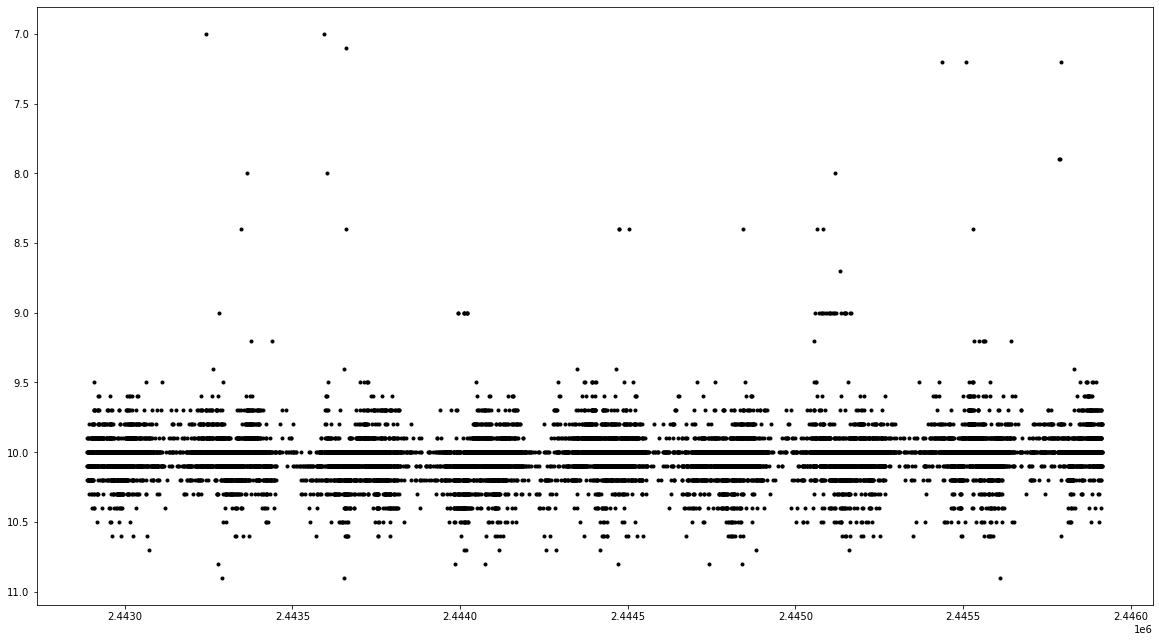

In [31]:
plt.figure(figsize=(20,11))
plt.gca().invert_yaxis()
plt.plot(vis_JD[21000:35000],vis_mags[21000:35000],'k.')

In [32]:
def second_smallest(numbers):
    m1 = m2 = float('inf')
    for x in numbers:
        if x <= m1:
            m1, m2 = x, m1
        elif x < m2:
            m2 = x
    return m2

In [33]:
t = v_JD[200:900]
print(np.min(np.diff(t)))

0.0002000001259148121


In [34]:
%%time

# Open data
vis_JD_n = vis_JD - 2436399.694
#t = vis_JD_n[21000:35000]
t = v_JD[200:900]
#mags = vis_mags[21000:35000]
mags = v_mags[200:900]
avg_mags = np.mean(mags)
f = mags - avg_mags		# the difference between the magnitude and the average magnitude
print(len(t))
print(len(mags))
print(len(f))


n = len(t)

# Plot mags vs JD
plt.figure(0)
plt.gca().invert_yaxis()

plt.plot(t, mags, 'k.')
plt.title("$\Delta$B vs JD")
#print(diff_t)
# Find frequency Nyquist
diff_t = np.diff(t)	# Difference for each observation time
wa = 1/(np.min(diff_t)*2) # w = 1/2*Pmin
print(wa)
# Selang 
s = .0001			# Interval/Step, the smaller the better, but should not be too small
dt = t[n-1]-t[0] 	# Time of observation, in days


#Method of Date Compensated Discrete Fourier Transform (DCDFT)
a0 = np.sqrt(1/n)
S = []
H = []
C = []
alpha = ((2.*(n-3)*dt*wa)/(3.*(n-4)))

ws = np.arange(s,wa,s)
for w in ws:
	sum_cos2x = sum_cosx = sum_cosxsinx = sum_sin2x = sum_sinx = sum_f_cos = sum_f_sin = sum_f2 = 0
	for i in range(n):
		x = 2.*np.pi*w*t[i]
		sum_cos2x += np.cos(x)**2
		sum_cosx += np.cos(x)
		sum_cosxsinx += (np.cos(x)*np.sin(x))
		sum_sin2x += np.sin(x)**2
		sum_sinx += np.sin(x)
		sum_f_cos += f[i]*np.cos(x)
		sum_f_sin += f[i]*np.sin(x)
		sum_f2 += f[i]**2
		pass
	M = sum_cosxsinx - (a0**2)*(sum_sinx)*(sum_cosx)
	a1 = np.sqrt(1./(sum_cos2x - (a0**2)*(sum_cosx**2)))
	a2 = np.sqrt(1./(sum_sin2x - (a0**2)*(sum_sinx**2) - (a1**2)*M))
	c1 = a1*sum_f_cos
	c2 = a2*sum_f_sin - (a1*a2*c1*M)
	S_ = ( c1**2. + c2**2. )/sum_f2
	G = (-1.*((n-3)/2.)*np.log(1.-(S_)))
	H_ = ((n-4)*1./(n-3))*(G + np.exp(-1.*G)-1.)
	S.append(S_)
	H.append(H_)
	C.append(100*(1-np.exp(-H_))**alpha)

fig, ax1 = plt.subplots()
ax1.plot(np.arange(s,wa,s),H,"b-", label="H")
ax1.plot(np.arange(s,wa,s),S,"r-", label="Spectral Correlation")
ax2 = ax1.twinx()
ax2.plot(np.arange(s,wa,s),C,"k-.", lw=1.2, label="Confident Level (%)")
fig.tight_layout()
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
ax1.set_xlabel('$frequency$')
ax1.set_ylabel('H($\omega$)')
ax1.set_xlim(0,wa)
ax2.set_ylabel('Confident Level (%)')
ax2.grid(color='k', linestyle='--', linewidth=.5)
ax1.set_title("Modified Periodogram or graph of the function H($\omega$). The confidence levels are also shown.")

# Find the Period 
P = 1/ws[np.argmax(H)]

fase_ = (t-t[0])/P
fase = (fase_) - np.floor(fase_)
fase = fase - fase[np.argmax(mags)]
fase_negatif = fase[fase < 0.]
fase = fase.tolist()
arg_fase_negatif = []
for neg in fase_negatif:
	# arg_fase_negatif.append(fase.index(neg))
	index = fase.index(neg)
	fase[index] = 1 + neg

plt.figure(2)
plt.figure(figsize=(20,11))
plt.plot(fase,mags,'b.')
plt.xlabel('Phase') 
plt.xlim(0,1)
plt.ylabel('$\Delta$B')
plt.title('Light Curve T CrB')

#Printing calculation results
# Print Period
print ("Nyquist frequency = {:.3f}".format(wa))
print ("The period of T CrB {:.3f}".format(P))
# # Print data
# print ("\nTabel 1. Data RS Oph")
# print ("============================================")
# print ("t\t\tdelta_B\t\tf\tfase")
# for i in range(n):
# 	print ("{}\t{}\t{:.3f}\t{:.3f}".format(t[i],mags[i],f[i],fase[i]))

# Show plot
plt.show()